# PID Control

[A good article explaining PID](https://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlPID#1)


## Formulation

Given the below system:

![pid_diagram](../images/pid_diagram.png)


Given that you have an error $e(t)$ defined as:

$$
e(t) = r(t) - y(t)
$$

Where:
- $r(t)$: Desired set point
- $y(t)$: measured process variable

The PID equation:

$$
u(t) = K_p e(t) + K_I \int^t_0 e(\tau)d\tau + K_D \frac{de(t)}{dt}
$$

In the laplace domain this becomes:

$$
U(s) = (K_P + \frac{K_I}{s} + K_D s)E(s)
$$

## Effects of gains
To see the effects the PID control, consider the below diagram:

![pid_response](../images/pid_response.png)


| Gain                  | Rise Time         | Overshoot          | Settling Time                     | Steady-State Error                                | Intuitive Explanation                                                             |
| --------------------- | ----------------- | ------------------ | --------------------------------- | ------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Proportional (Kp)** | ↓ (faster)        | ↑ (more overshoot) | Slight ↓ or ↑ (depends on system) | ↓ (improves, but not to zero for certain systems) | Stronger reaction to current error — makes system more aggressive and responsive. |
| **Integral (Ki)**     | ↓ (faster)        | ↑ (more overshoot) | ↑ (longer, may oscillate)         | ↓↓ (eliminates steady-state error)                | Accumulates past error — drives error to zero but can destabilize if too high.    |
| **Derivative (Kd)**   | Slight ↑ (slower) | ↓ (less overshoot) | ↓ (faster damping)                | No direct effect                                  | Reacts to error rate — anticipates motion, adds damping, smooths oscillations.    |


## Spring Mass Example

![spring_mass](../images/spring_mass_system.png)


The system:

$$
m\ddot{x} + b\dot{x} + kx = F
$$

where F is the control force from a PID controller trying to make x(t) follow a desired position (setpoint).

Or in other words if we define the state as:

where

$$
\mathbf{x} = 
\begin{bmatrix}
x \\
\dot{x} \\
\end{bmatrix}
$$

And the traditional system fomrulation:

$$
\mathbf{\dot{x}} = f(\mathbf{x}, u)
$$

Where $u = F$

Then the system becomes:

$$
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{x} \\
\ddot{x} \\
\end{bmatrix} =
\begin{bmatrix}
0 & 1 \\
-k & -b/m \\
\end{bmatrix}
\begin{bmatrix}
x \\
\dot{x} \\
\end{bmatrix} +
\begin{bmatrix}
0 \\
1/m \\
\end{bmatrix} u
$$




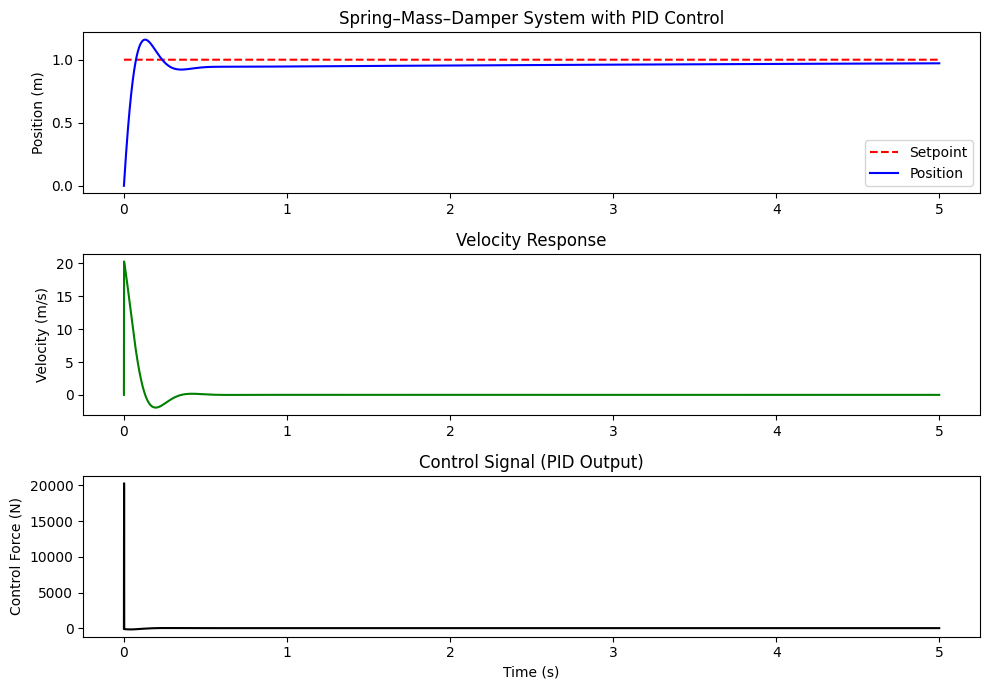

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# System parameters
# -----------------------------
m = 1.0      # mass (kg)
k = 20.0     # spring constant (N/m)
b = 2.0      # damping coefficient (Ns/m)

# PID gains
Kp = 300.0
Ki = 50.0
Kd = 20.0

# Simulation settings
dt = 0.001          # time step (s)
t_end = 5.0         # total time (s)
t = np.arange(0, t_end, dt)
n = len(t)

# Desired setpoint (step input)
x_target = np.ones(n)  # desired position = 1 m after t=0

# Initialize variables
x = np.zeros(n)   # position
v = np.zeros(n)   # velocity
u = np.zeros(n)   # control force
e_prev = 0.0
integral = 0.0

# -----------------------------
# Simulation loop
# -----------------------------
for i in range(1, n):
    e = x_target[i] - x[i-1]          # error
    integral += e * dt                # integral term
    derivative = (e - e_prev) / dt    # derivative term
    e_prev = e

    # PID controller
    u[i] = Kp * e + Ki * integral + Kd * derivative

    # System dynamics: m*x_ddot + c*x_dot + k*x = u
    a = (u[i] - b * v[i-1] - k * x[i-1]) / m

    # Integrate acceleration → velocity → position
    v[i] = v[i-1] + a * dt
    x[i] = x[i-1] + v[i] * dt

# -----------------------------
# Plot results
# -----------------------------
plt.figure(figsize=(10,7))

# Position response
plt.subplot(3,1,1)
plt.plot(t, x_target, 'r--', label='Setpoint')
plt.plot(t, x, 'b', label='Position')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Spring–Mass–Damper System with PID Control')

# Velocity
plt.subplot(3,1,2)
plt.plot(t, v, 'g')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Response')

# Control effort
plt.subplot(3,1,3)
plt.plot(t, u, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Control Force (N)')
plt.title('Control Signal (PID Output)')

plt.tight_layout()
plt.show()
